# K-Means Clustering


## Goal:

When working with unsupervised learning methods, its usually important to lay out a general goal. 

In our case, let's attempt to find reasonable clusters of customers for marketing segmentation and study. What we end up doing with those clusters would depend **heavily** on the domain itself, in this case, marketing.

----


## The Data

LINK: https://archive.ics.uci.edu/ml/datasets/bank+marketing

   This dataset is public available for research. The details are described in [Moro et al., 2011]. 


      [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
      In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

      Available at: [pdf] http://hdl.handle.net/1822/14838
                    [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt
     For more information, read [Moro et al., 2011].

    # bank client data:
    1 - age (numeric)
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')
    # related with the last contact of the current campaign:
    8 - contact: contact communication type (categorical: 'cellular','telephone')
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
    # other attributes:
    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    # social and economic context attributes
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)
    21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

----

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/bank-full.csv')

## Exploratory Data Analysis

Two points to keep in mind during EDA.

**1) If we don't have domain knowledge, always consult with someone who have domain knowledge and know the data.**

**2) Always try to make plenty of visulaizations, get to know the data.**

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Continuous Feature Analysis

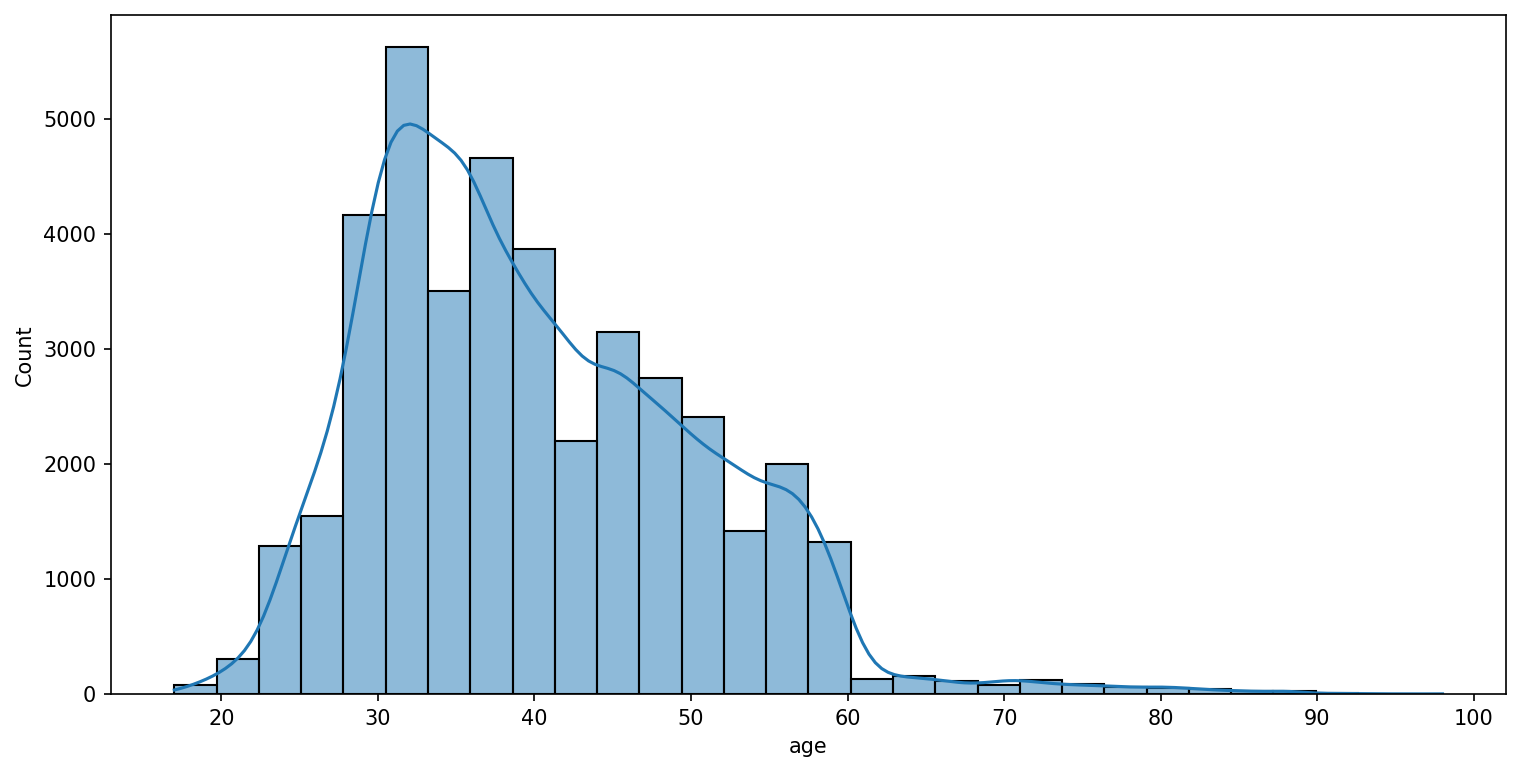

In [8]:
plt.figure(figsize=(12,6), dpi=150)
sns.histplot(data=df, x='age', bins=30, kde=True);

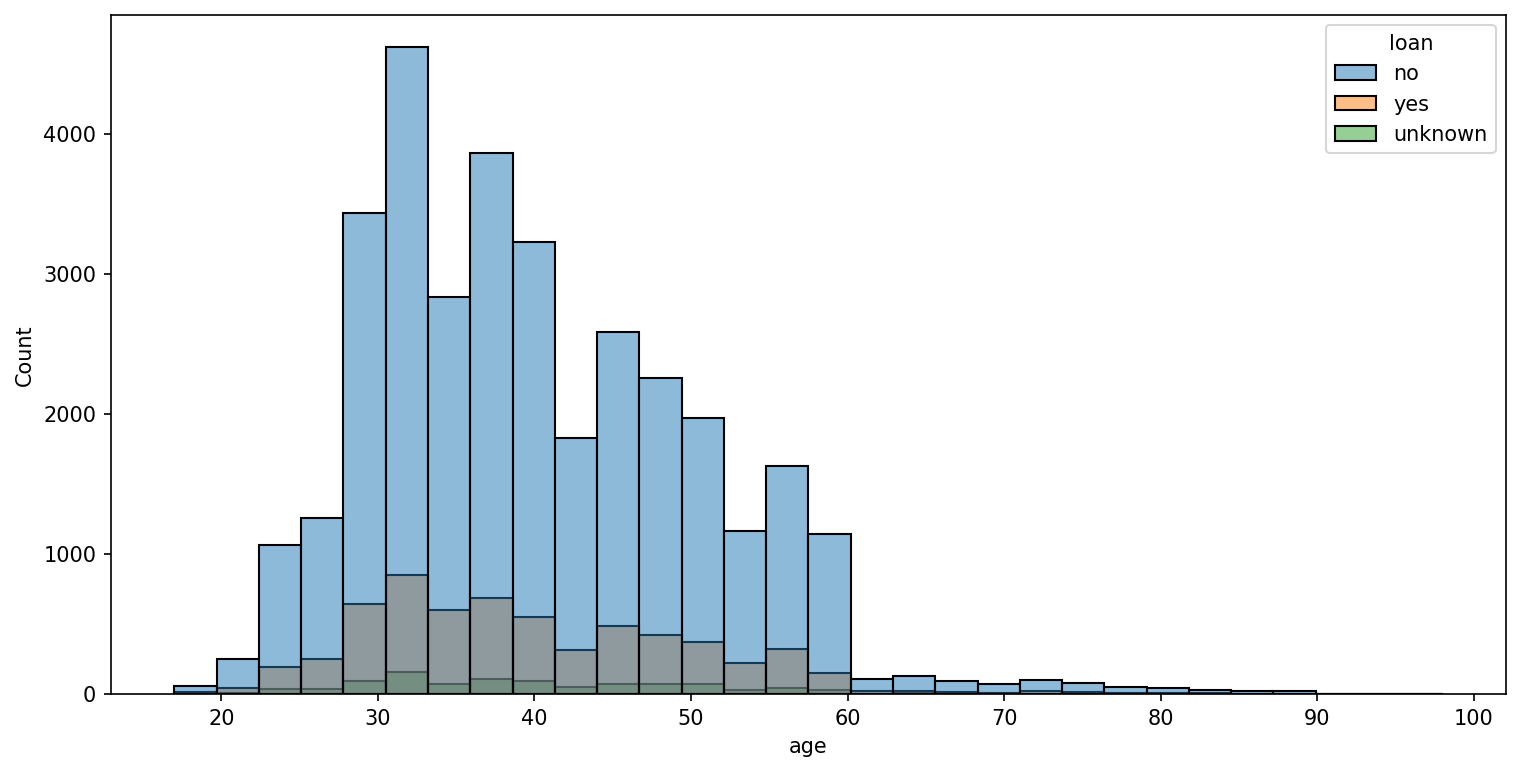

In [10]:
plt.figure(figsize=(12, 6), dpi=150)
sns.histplot(data=df, x='age', hue='loan', bins=30);

There are no right or wrong answer in unsupervised learning. 

Example: 
1) If we are marketing for a loan, we might want to not target the people who already had a loan because they might not take another loan.
2) Or maybe we might want to target the people who already had a loan because they had converted.

----

We want to see `pdays` distribution. P day is number of days since they had been contacted by marketing campign. 
999 means they had never contacted before.


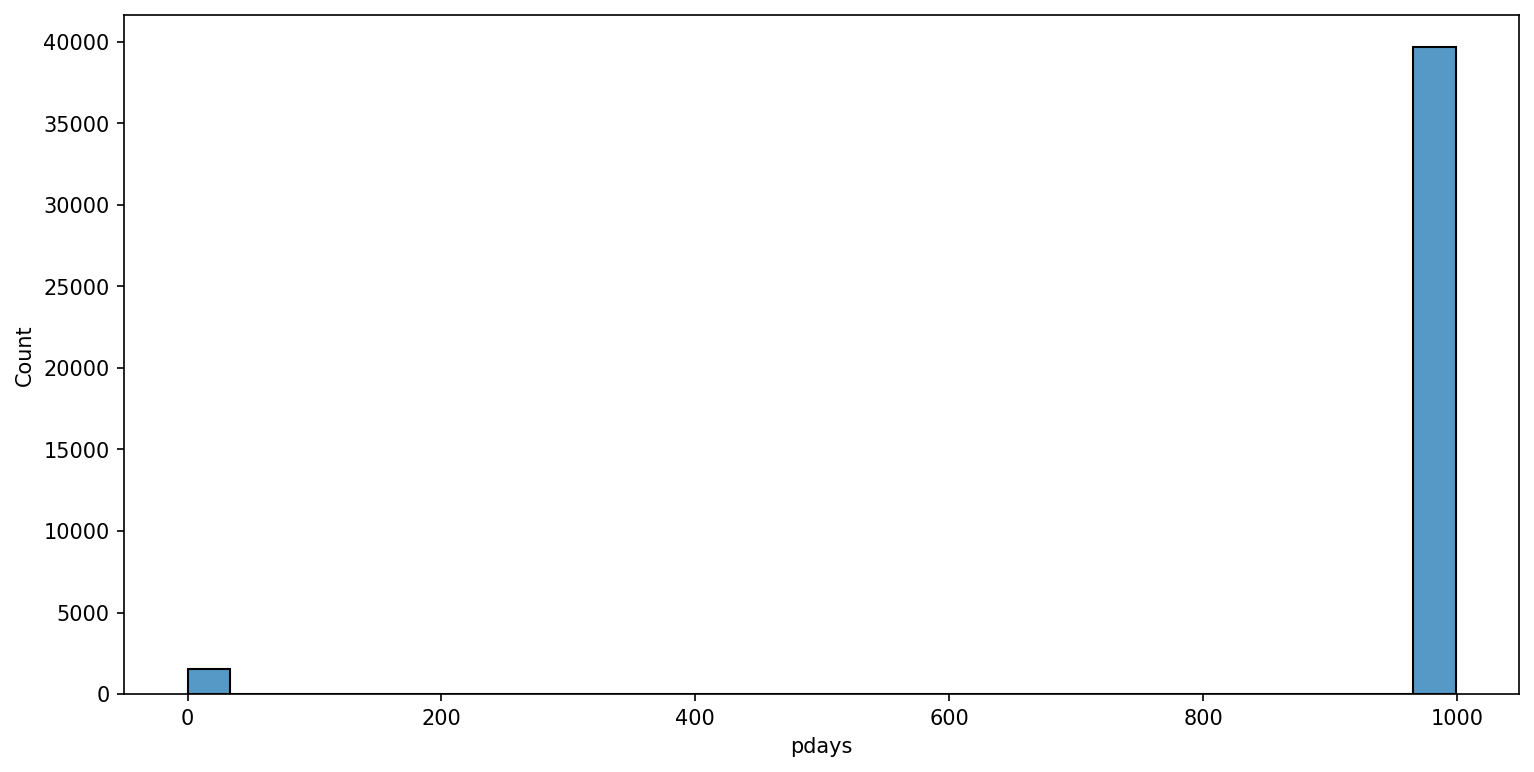

In [11]:
plt.figure(figsize=(12, 6), dpi=150)
sns.histplot(data=df, x='pdays', bins=30);

If we look at the above chart, it is quite confusing. So we might want to clean up a little bit more. As most of the people have never been contacted before, there are a lot of people on 1000 side. (999 means a person is never contacted before for marketing purpose).

What we can do is to shrink down the data limit.

-----

After we filter out only the people who had contacted before, we have much clearer distribution.

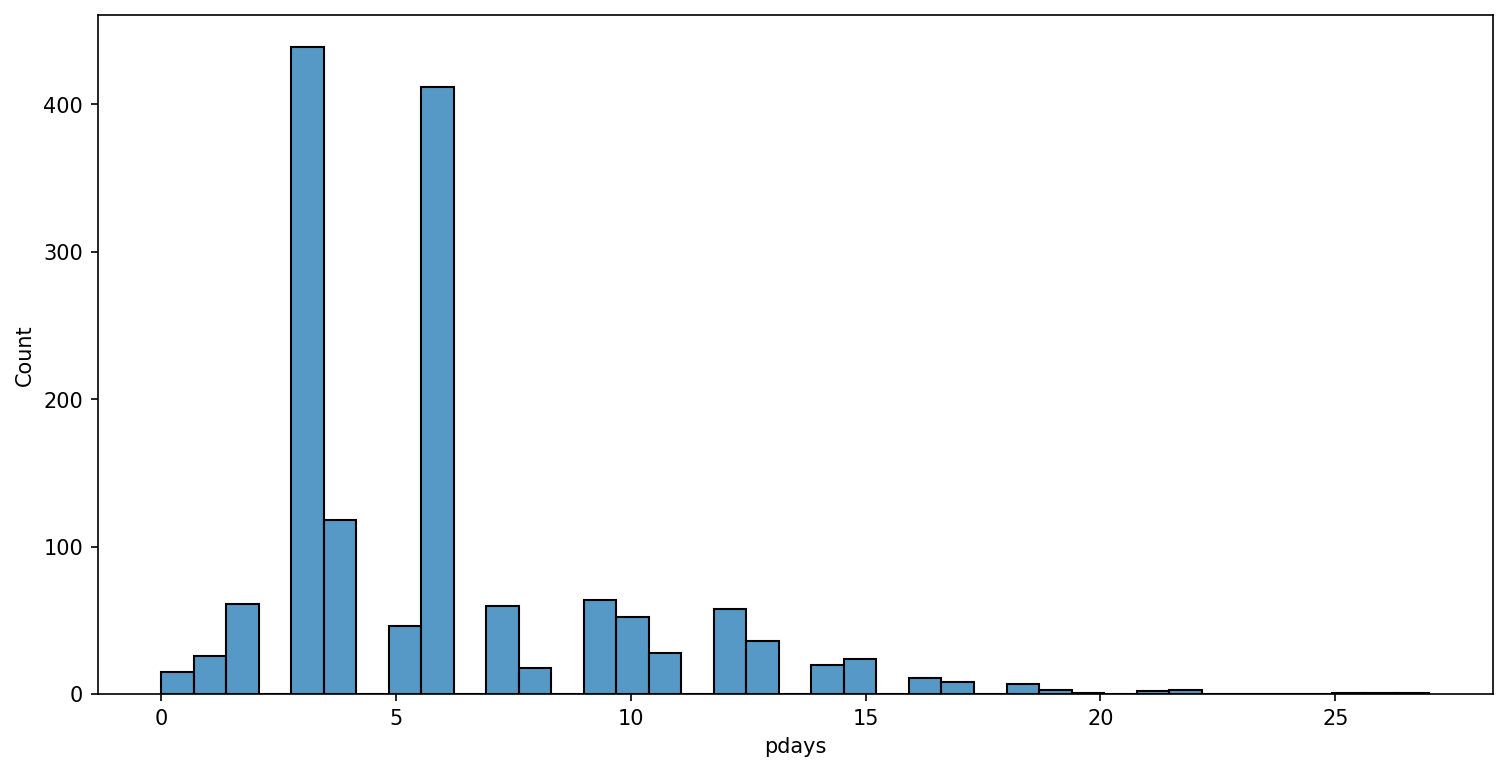

In [12]:
contacted_before = df[df['pdays']!=999] # filter out only the people contacted before.

plt.figure(figsize=(12,6), dpi=150)
sns.histplot(data=contacted_before, x='pdays');

It seem like most of the people haven't been contacted around 3 to 10 days. However this data only represents people who have contacted before which is a minority among the whole data.

----

**Contact duration - contact with customer made, how long did call last?**

In [13]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

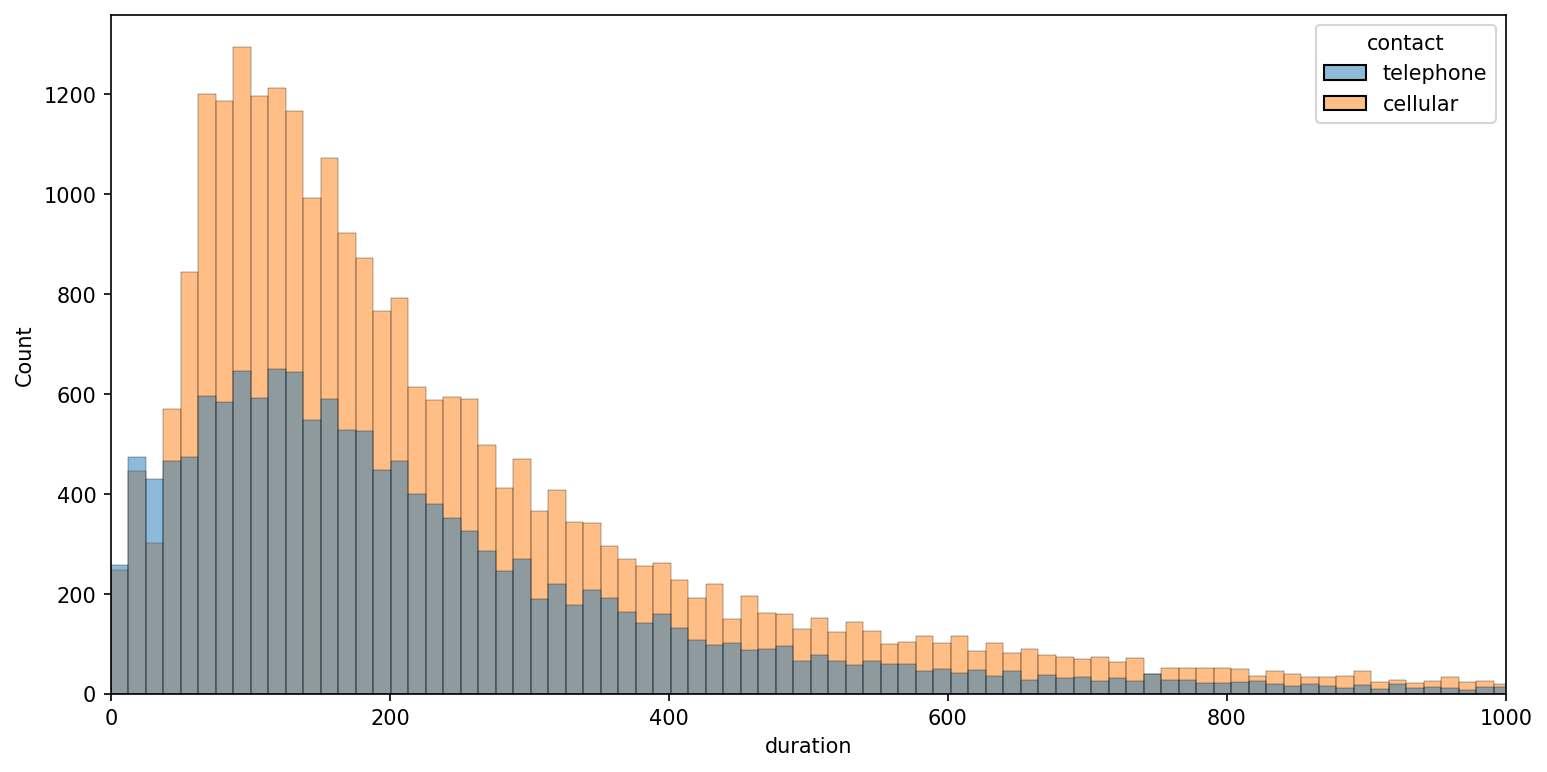

In [19]:
plt.figure(figsize=(12, 6), dpi=150)
sns.histplot(data=df, x='duration', hue='contact');
plt.xlim(0, 1000);

We can see that two distributions ( contacted via landline phone or cell phone) are extremly similar.

Propably more people give cell phone numbers or cellphone is always with us, that's why those data points are much higher than landline ones.

In [20]:
df['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

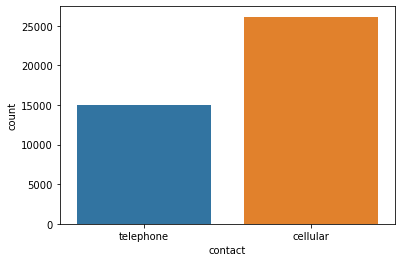

In [21]:
sns.countplot(data=df, x='contact');

* 15 - previous: number of contacts performed before this campaign and for this client (numeric)
* 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success"

In [40]:
df['previous'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

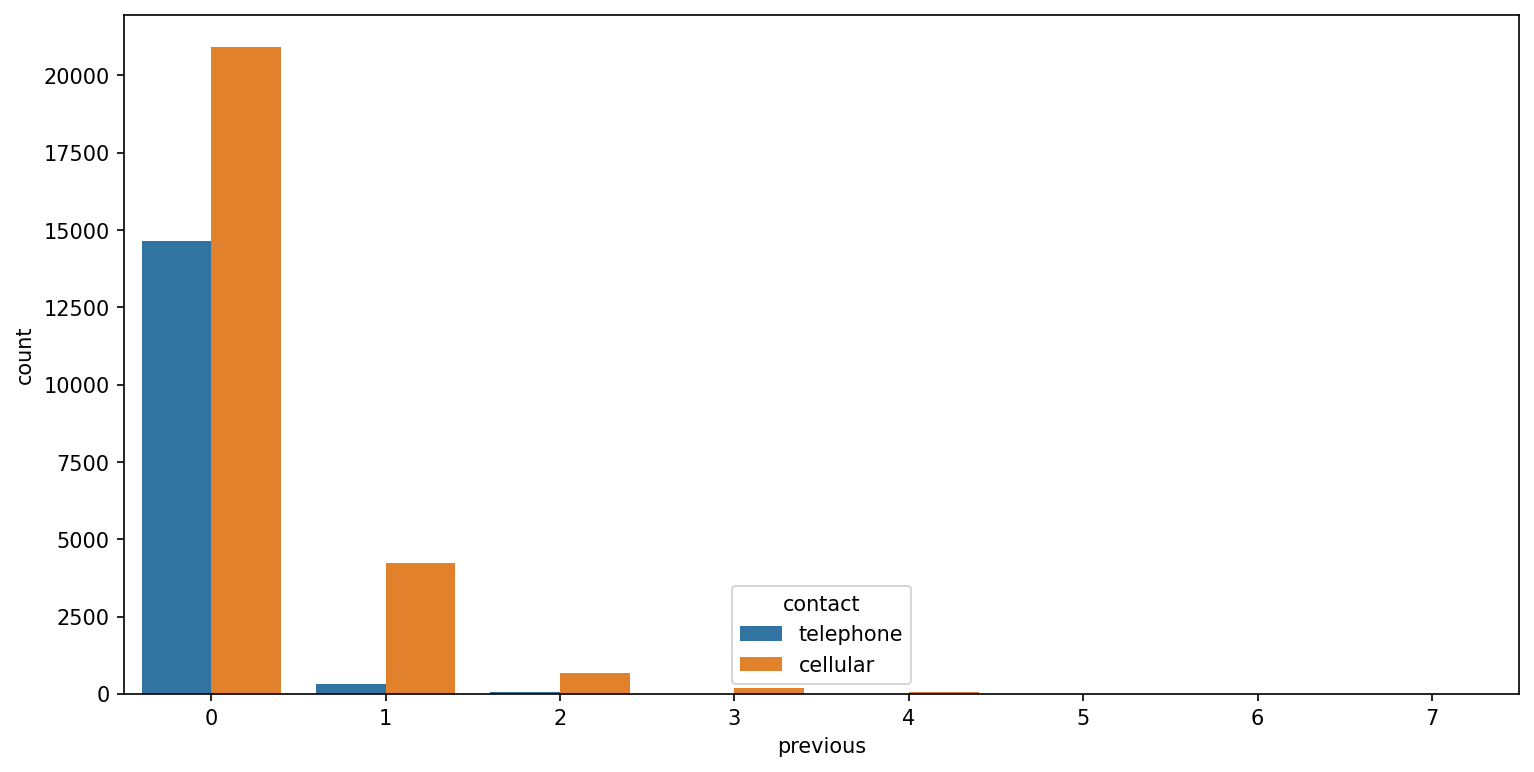

In [38]:
plt.figure(figsize=(12, 6), dpi=150)
sns.countplot(data=df, x='previous', hue='contact');

---------

# Categorical Features

### Exploring `job`

In [41]:
job_order = df['job'].value_counts().sort_values(ascending=False)
job_order

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [42]:
job_order.index

Index(['admin.', 'blue-collar', 'technician', 'services', 'management',
       'retired', 'entrepreneur', 'self-employed', 'housemaid', 'unemployed',
       'student', 'unknown'],
      dtype='object')

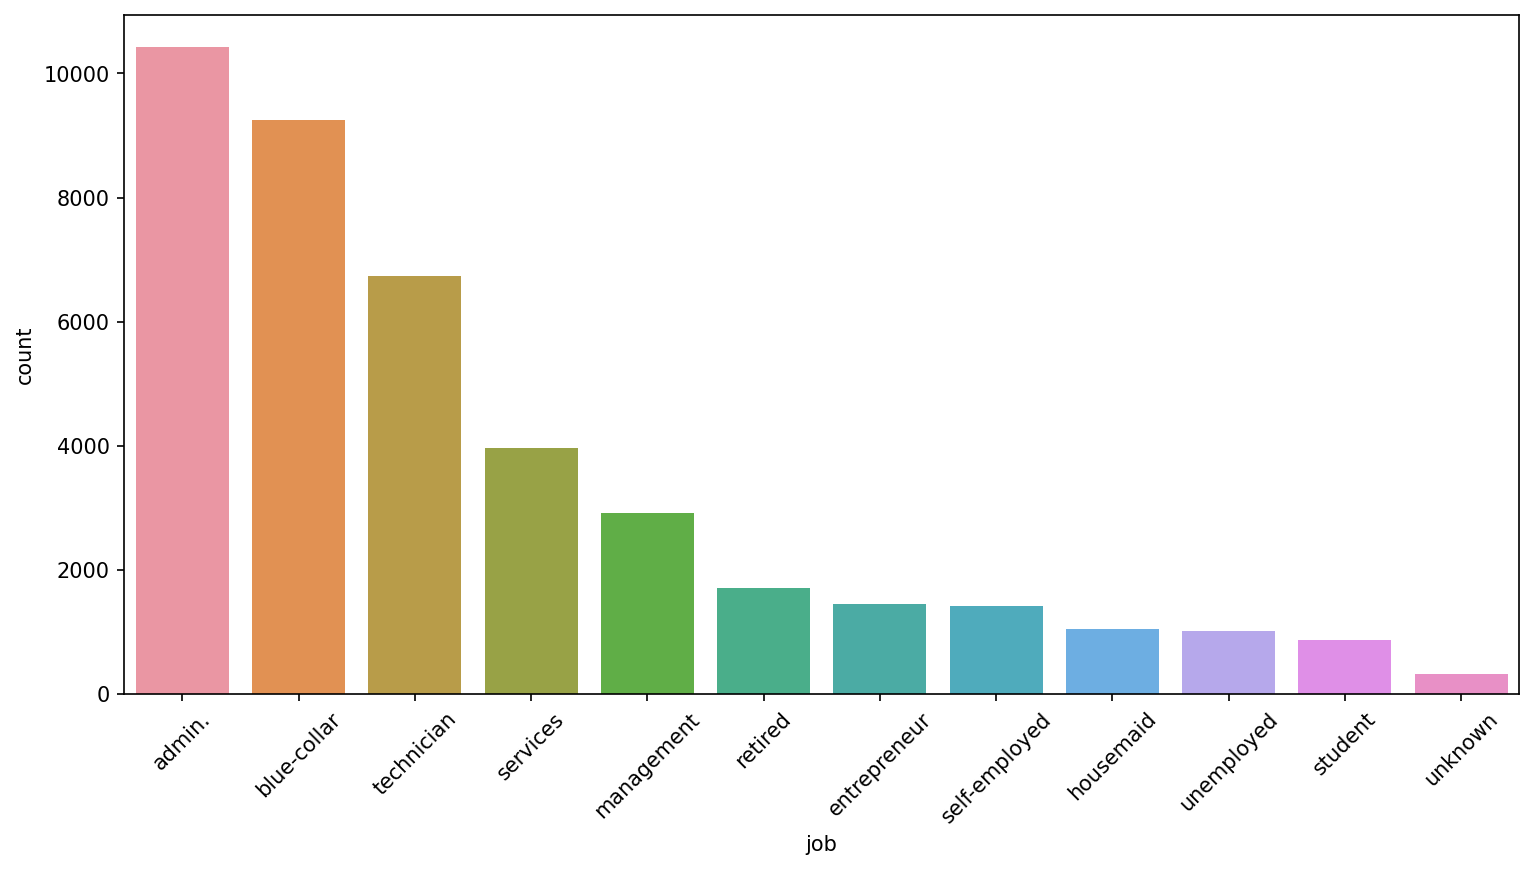

In [43]:
plt.figure(figsize=(12, 6), dpi=150)
sns.countplot(data=df, x='job', order=job_order.index);
plt.xticks(rotation=45);

### Exploring `Education`

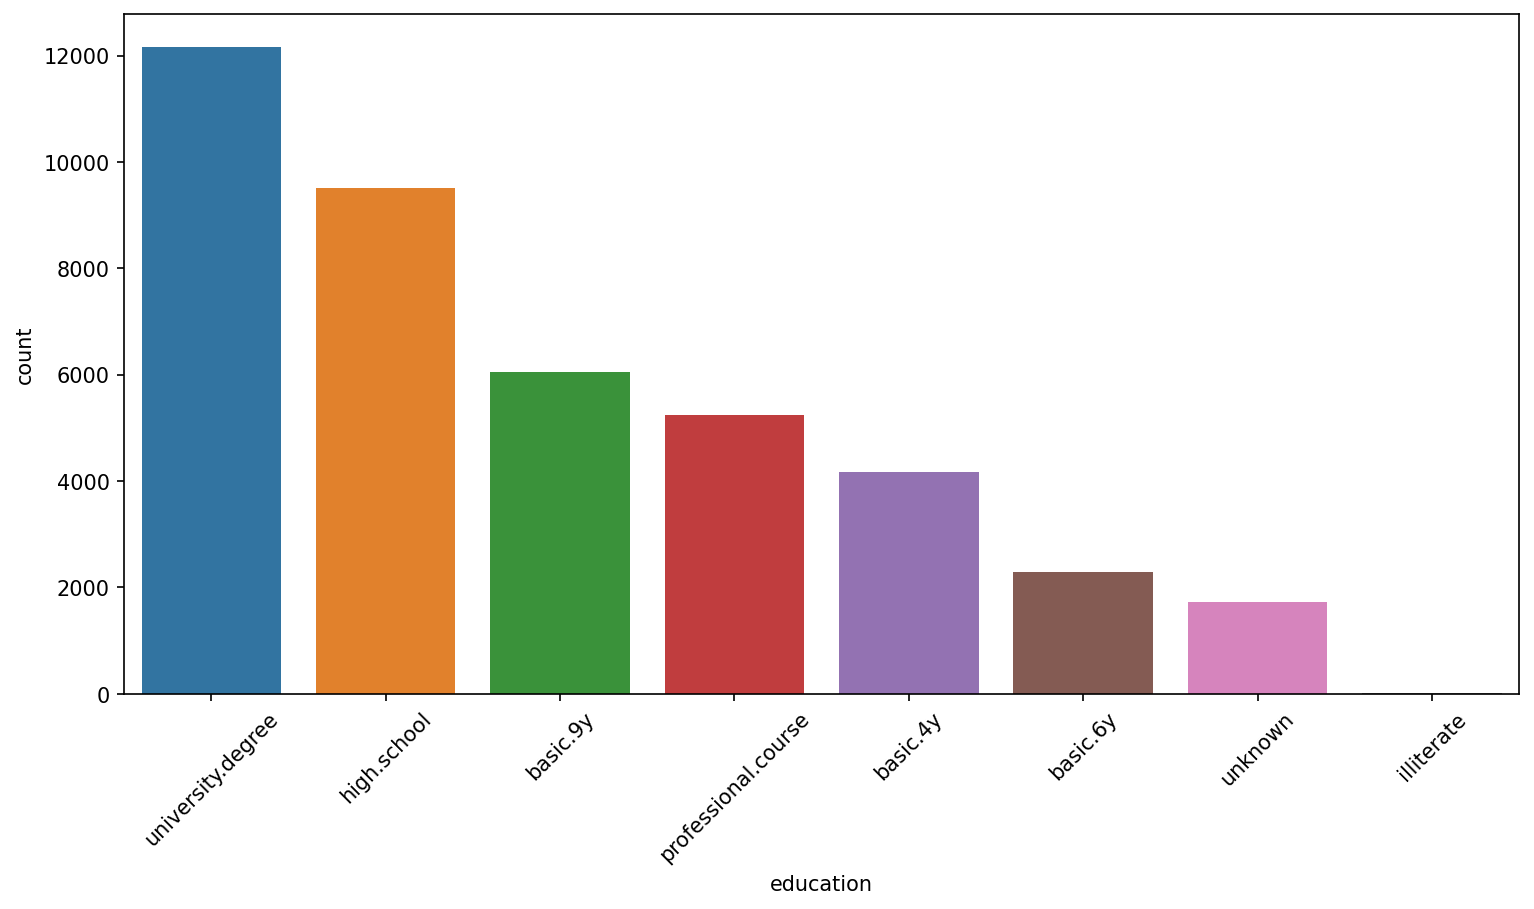

In [45]:
plt.figure(figsize=(12, 6), dpi=150)
sns.countplot(data=df, x='education', order=df['education'].value_counts().sort_values(ascending=False).index);
plt.xticks(rotation=45);

Checking the education level and their relation with Defaulting loan or not.

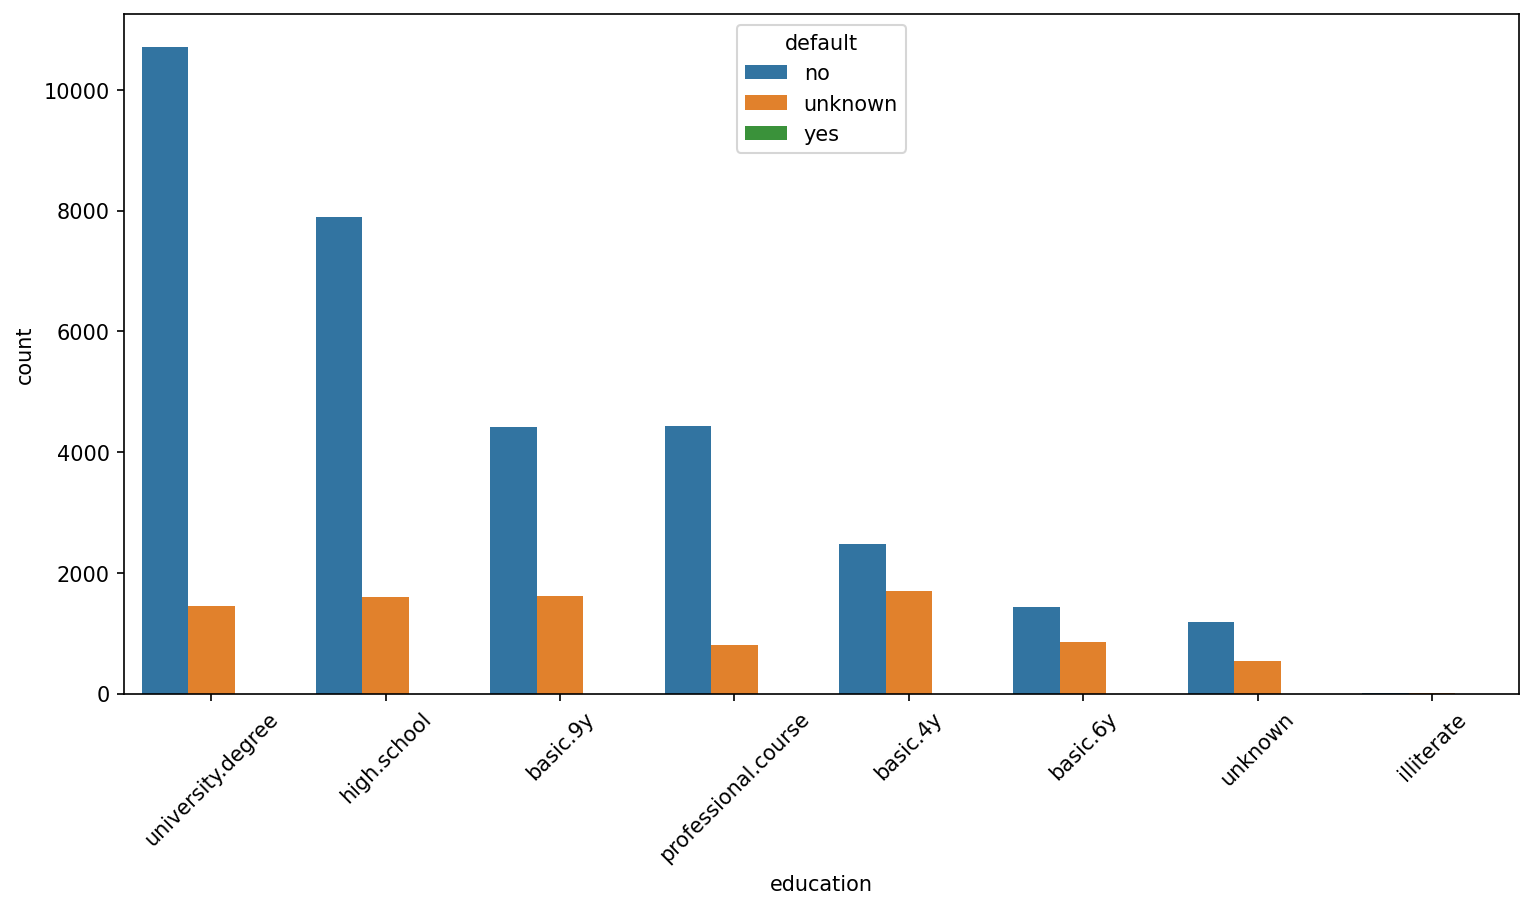

In [46]:
plt.figure(figsize=(12, 6), dpi=150)
sns.countplot(data=df, x='education', order=df['education'].value_counts().sort_values(ascending=False).index, hue='default');
plt.xticks(rotation=45);

In [47]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

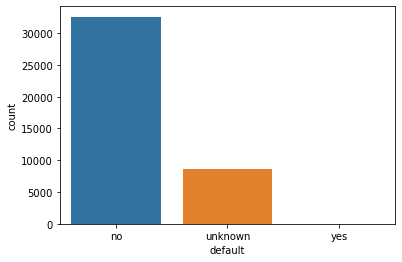

In [48]:
sns.countplot(data=df, x='default');

---------

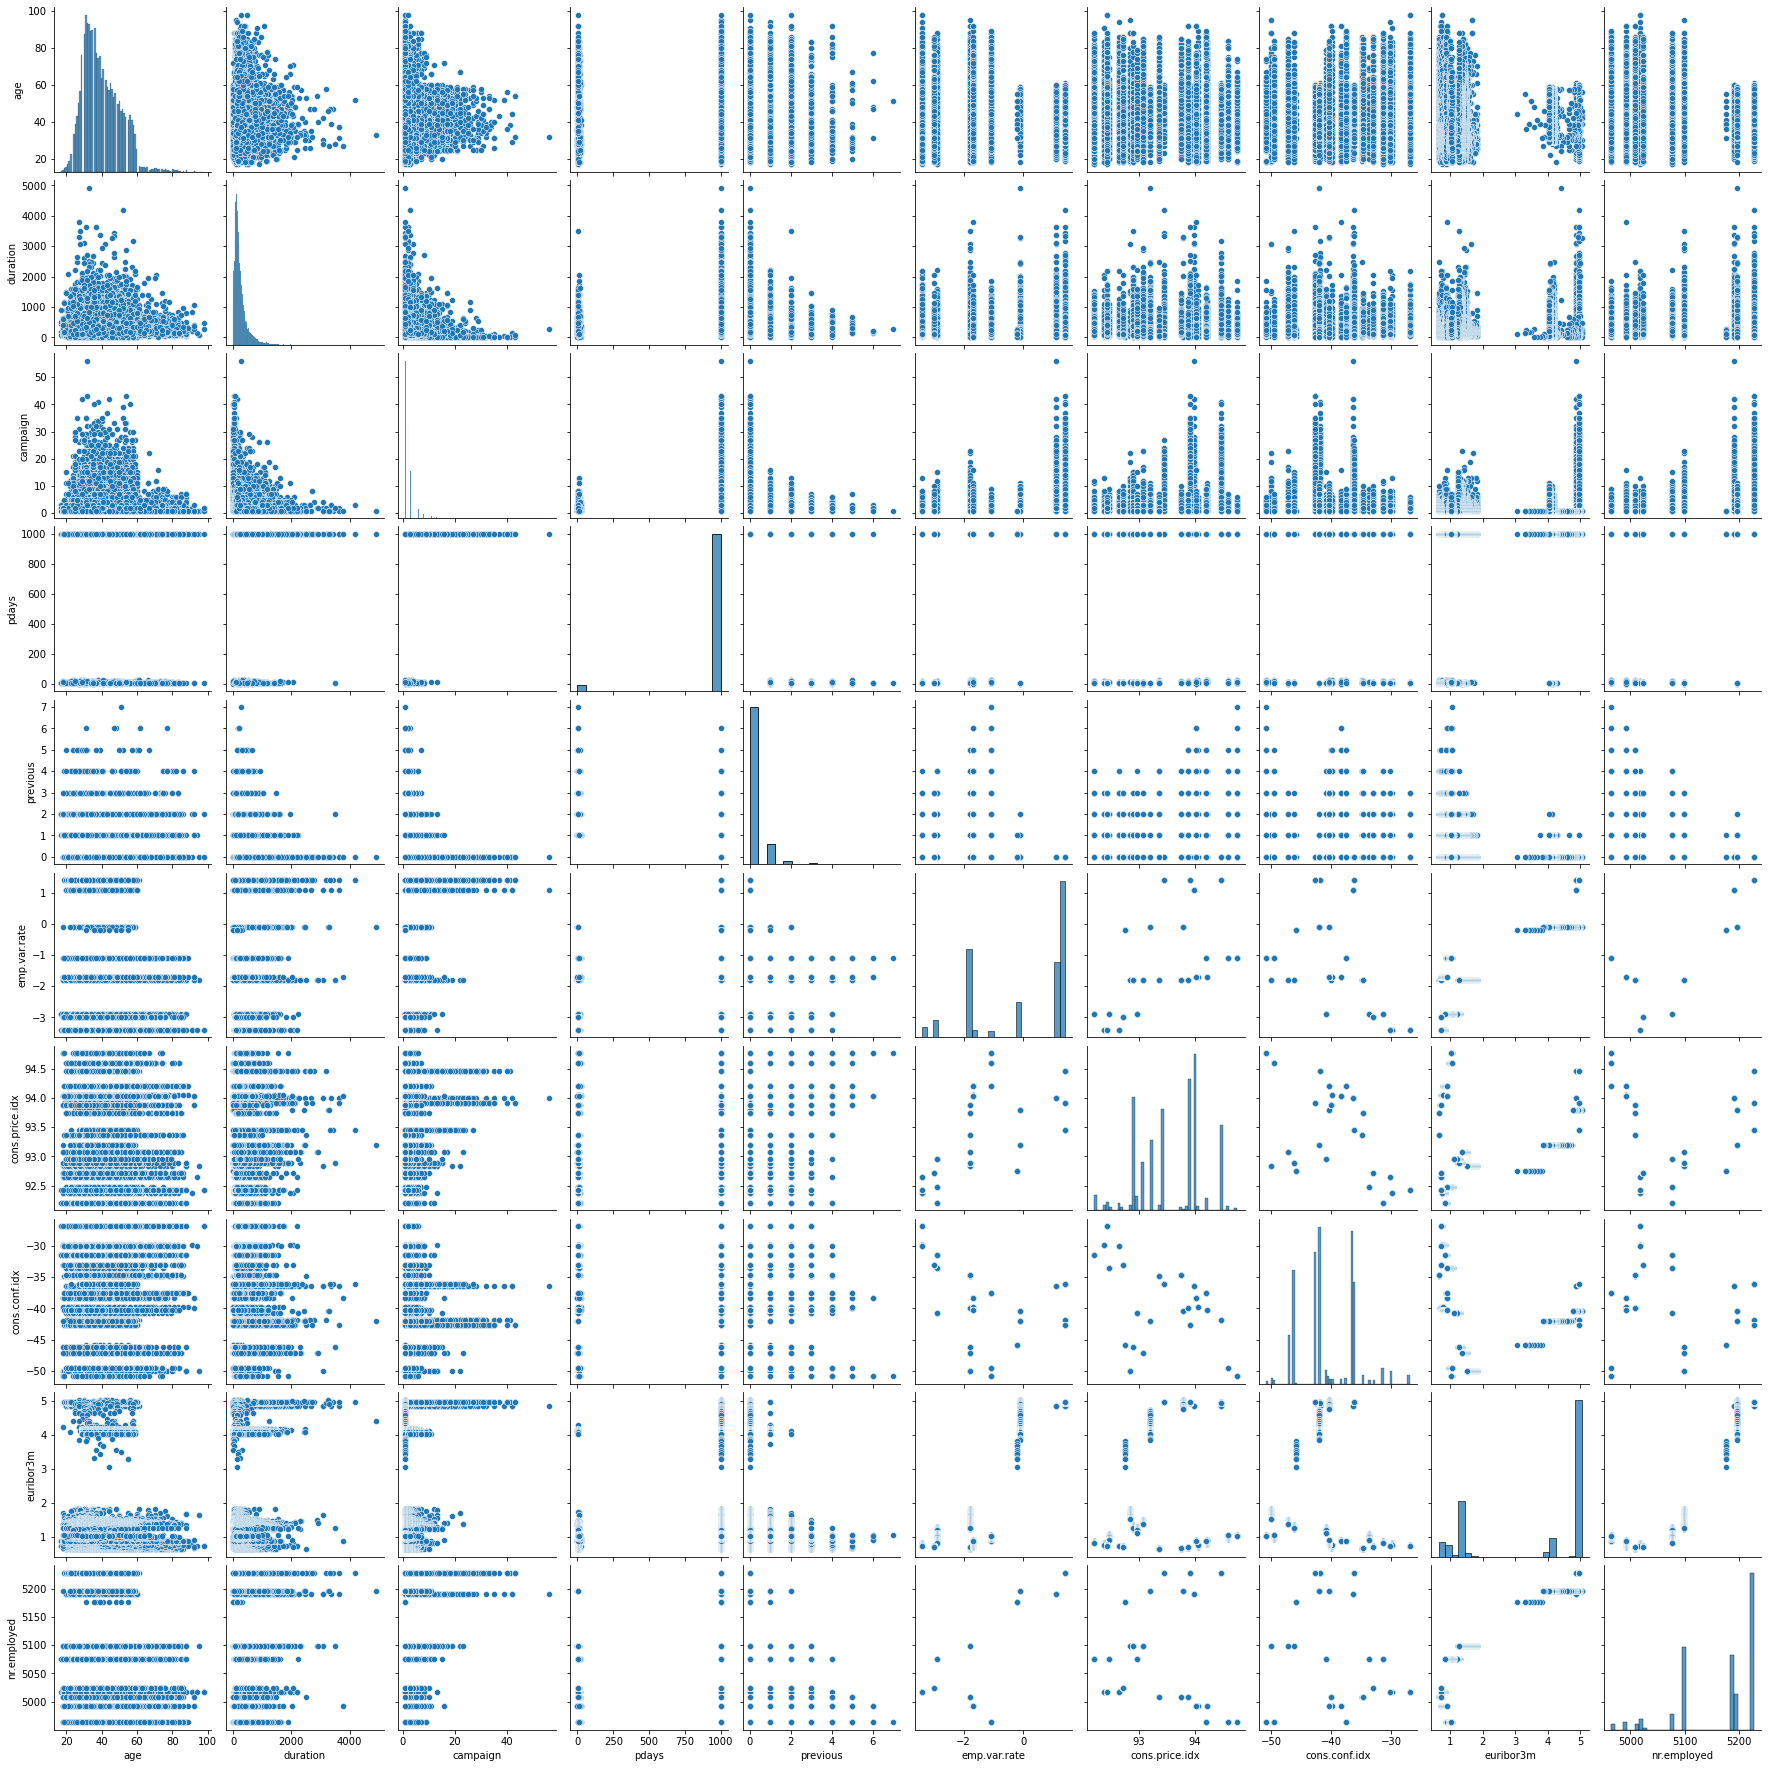

In [49]:
sns.pairplot(df);

-------

# Clustering

# Data Preparation

In clustering, we can't directly use the categorical variables as everything is based on distance matrix. In Unsupervised learning (Clustering), the distance between the groups are more useful as we need to differentiate across the similar data points. 


**UNSUPERVISED LEARNING REMINDER: NO NEED TO TRAIN TEST SPLIT!! NO LABEL TO "TEST" AGAINST!**

We do however need to transform categorical features into numeric ones where it makes sense to do so, as well as **scaling the data due to distance being a key factor in clustering**.

NOTE: We also don't need to drop the last column after converting to dummy variables as dummy variable trap doesn't impact in Clustering.

In [50]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Dummyfy the features

In [51]:
X = pd.get_dummies(df)
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1


### Scaling the data
+ we need to scale the data as we are dealing with multiple scales of numbers (some are between 0 and 1, some are between 9999 and 0). In Clustering the distance is important and we don't want to distort our data.

We can directly fit_transform() our X as we don't need to worry about data leakage or what so ever as there is no label in the first place.

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()

In [56]:
scaled_X = scaler.fit_transform(X)

scaled_X

array([[ 1.53303429,  0.01047142, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [ 1.62899323, -0.42150051, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [-0.29018564, -0.12451981, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       ...,
       [ 1.53303429, -0.26722482, -0.20490853, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [ 0.38152696,  0.70856893, -0.56592197, ..., -0.1857    ,
        -2.80655022,  2.80655022],
       [ 3.26029527, -0.07438021,  0.15610492, ..., -0.1857    ,
         0.35630932, -0.35630932]])

### Creating and Fitting a KMeans Model

Note of our method choices here:

* `fit(X[, y, sample_weight])`
    * Compute k-means clustering.

* `fit_predict(X[, y, sample_weight])`
    * Compute cluster centers and predict cluster index for each sample.

* `fit_transform(X[, y, sample_weight])`
    * Compute clustering and transform X to cluster-distance space.

* `predict(X[, sample_weight])`
    * Predict the closest cluster each sample in X belongs to.

In [57]:
from sklearn.cluster import KMeans

In [59]:
# help(KMeans)

In [61]:
model = KMeans(n_clusters=2)

At this point, we don't really know 2 is the correct choice for n_clusters. But it is a good starting point as we can assume for markerting, there is a group of people who want to be markerted and another group who doesn't.

In [65]:
# similar to doing fit_transform, doing two tasks at once.
cluster_labels = model.fit_predict(scaled_X)

In [66]:
cluster_labels

array([0, 0, 0, ..., 1, 1, 1])

Now we can join the cluster labels back to original datasets.

In [67]:
X['Cluster'] = cluster_labels

In [68]:
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0


### How can we interpret this ?
+ one way is to check correlation between the features and cluster assignment.

In [74]:
X.corr()['Cluster'].iloc[:-1]

age                    -0.019767
duration                0.039581
campaign               -0.129103
pdays                  -0.267714
previous                0.478493
                          ...   
poutcome_failure        0.464320
poutcome_nonexistent   -0.544406
poutcome_success        0.254406
subscribed_no          -0.294472
subscribed_yes          0.294472
Name: Cluster, Length: 65, dtype: float64

We can see that `subscired_no`and `subscried_yes` are perfect images of values. This makes sense as we dummyfy `subscribed` feature. This won't impact the model prediction. 

But we need to take note of those while we are reporting data analysis.

In [75]:
X.corr()['Cluster'].iloc[:-1].sort_values()

euribor3m              -0.959328
emp.var.rate           -0.932622
nr.employed            -0.886190
cons.price.idx         -0.679350
poutcome_nonexistent   -0.544406
                          ...   
subscribed_yes          0.294472
month_apr               0.357942
contact_cellular        0.410444
poutcome_failure        0.464320
previous                0.478493
Name: Cluster, Length: 65, dtype: float64

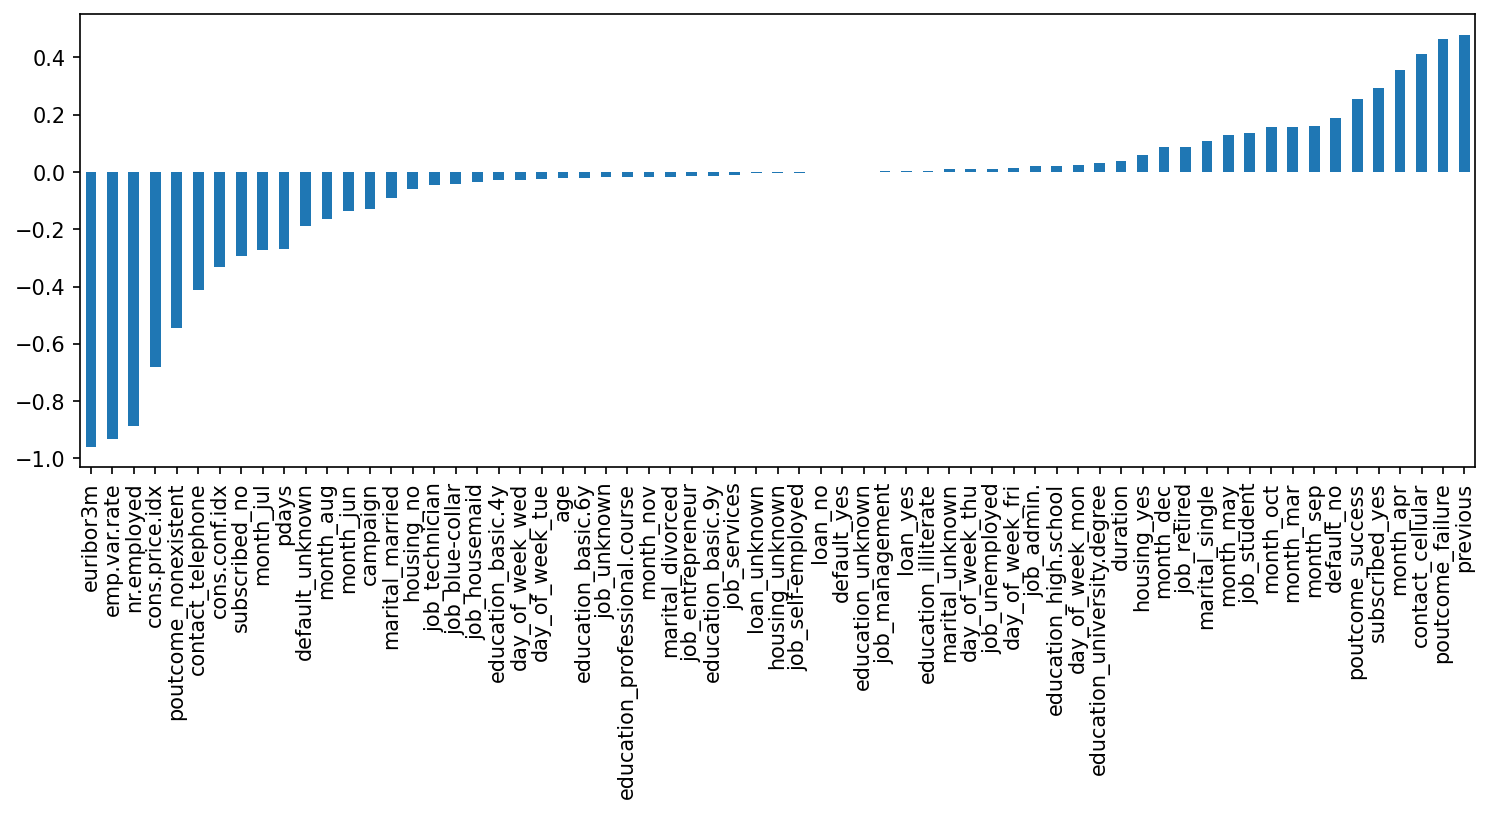

In [78]:
plt.figure(figsize=(12,4), dpi=150)
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar');

-------

# Choosing K Value

In the above correlation, we can see the corelation between features and assigned cluster.

However it doesn't tell us chosen `K-value` is the best or not. 

For this reason, we will use Elbow method.

In [80]:
ssd = []

for k in range(2, 10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    
     #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

In [82]:
ssd

[2469792.4011378568,
 2370787.8799482733,
 2271503.4230185724,
 2192021.528886079,
 2161659.9488491686,
 2116652.576083623,
 2067853.3185208172,
 2003987.7228233241]

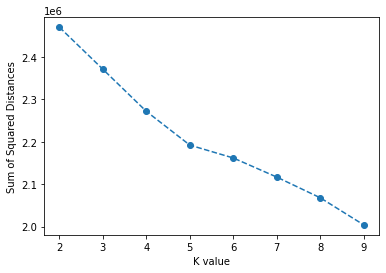

In [84]:
plt.plot(range(2, 10), ssd, '--o');
plt.xlabel('K value')
plt.ylabel('Sum of Squared Distances');

We can see that there is slight reduction between K is 5 and 6.

### Analyzing SSE Reduction

In [85]:
pd.Series(ssd)

0    2.469792e+06
1    2.370788e+06
2    2.271503e+06
3    2.192022e+06
4    2.161660e+06
5    2.116653e+06
6    2.067853e+06
7    2.003988e+06
dtype: float64

Using pandas, we can easily calculate the difference between one point and subsequence point. 

In [86]:
# Change in SSD from previous K value!
pd.Series(ssd).diff()

0             NaN
1   -99004.521190
2   -99284.456930
3   -79481.894132
4   -30361.580037
5   -45007.372766
6   -48799.257563
7   -63865.595697
dtype: float64

Take note that the indexes number are not directly applicable as `K-Value` as these are just difference between rows. So index 1 is difference between K-Value 1 and 2... etc.

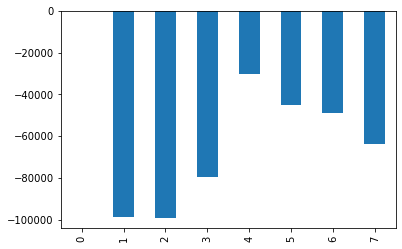

In [88]:
pd.Series(ssd).diff().plot(kind='bar');